In [16]:
library(dplyr)
library(ggplot2)
library(ggbeeswarm)

In [1]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv")
head(leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,...,192.39730,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,...,34.96152,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11


In [2]:
# annos_file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
annos_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/annotation_gene_level.tsv"
annos = read.csv(annos_file,sep="\t")
head(annos,2)

feature_id,chromosome,start,end
ENSG00000223972,1,11869,14412
ENSG00000227232,1,14363,29806


In [3]:
# example 1
gene = "SFXN5"
# D52 Sert ROT

In [4]:
### rsid (Sert): rs4500972

In [5]:
annos[annos$hgnc_symbol == gene,]

feature_id,chromosome,start,end


In [17]:
# #### get expression
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
myfile = paste0(mydir,"pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.celltype.Sert.groupedby.donor_id-celltype-treatment.mean.tsv")
df = read.csv(myfile,sep="\t")
df[1:5,1:5]

donor_id,celltype,treatment,n_cells,AL627309.1
HPSI0114i-bezi_3,Sert,NONE,68,0.03225962
HPSI0114i-bezi_3,Sert,ROT,58,0.00276752
HPSI0114i-eipl_1,Sert,NONE,42,0.01843045
HPSI0114i-eipl_1,Sert,ROT,44,0.00722513
HPSI0114i-fikt_3,Sert,NONE,26,0.00000000


In [18]:
good_donors = df[df$n_cells >50 & df$treatment == 'ROT',c("donor_id","treatment")]$donor_id

In [19]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Sert/"
pheno_file = paste0(mydir, "phenotypes.tsv")
pheno = read.csv(pheno_file,sep="\t")
head(pheno,2)

ensembl_gene_id,HPSI0114i.bezi_3,HPSI0114i.eipl_1,HPSI0114i.fikt_3,HPSI0114i.kolf_2,HPSI0114i.lexy_2,HPSI0114i.posc_1,HPSI0114i.rozh_4,HPSI0114i.vass_1,HPSI0114i.wegi_1,...,HPSI1113i.bima_1,HPSI1113i.hayt_3,HPSI1113i.ieki_3,HPSI1113i.podx_1,HPSI1113i.qolg_1,HPSI1113i.qorq_1,HPSI1113i.vuud_2,HPSI1114i.kuul_1,HPSI1114i.ualf_6,HPSI1213i.hehd_1
ENSG00000261657,0.353294164,0.2862783,0.21444695,0.253425717,0.22801267,0.2663584,0.282673955,0.192319945,0.221492663,...,0.24069670,0.258979768,0.343341,0.20157142,0.243570328,0.23427549,0.23490462,0.20412076,0.249044746,0.313499749
ENSG00000227640,0.006752759,0.0000000,0.04730725,0.007755129,0.01284033,0.0000000,0.006427986,0.007773887,0.009516524,...,0.01406963,0.007696712,0.000000,0.01089645,0.004195279,0.01910956,0.01743835,0.00848035,0.007274092,0.005590654


In [20]:
df_e = data.frame(donor_id = gsub("\\.","-",colnames(pheno)[2:ncol(pheno)]),
               gene = t(pheno[pheno$ensembl_gene_id == 'ENSG00000144040',2:ncol(pheno)]))
colnames(df_e)[2] = "SFXN5"
head(df_e,2)

,donor_id,SFXN5
HPSI0114i.bezi_3,HPSI0114i-bezi_3,0.01609323
HPSI0114i.eipl_1,HPSI0114i-eipl_1,0.04214113


In [21]:
covs_file = paste0(mydir, "covariates.tsv")
covs = read.csv(covs_file,sep="\t")
colnames(covs)[1] = "donor_id"
head(covs,2)

donor_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
HPSI0114i-bezi_3,0.3318606,-4.278461,0.5563826,-0.2822374,-4.738619,0.4572596,-0.7995971,0.453250,2.6759227,0.4329498,-0.3524559,-0.08393687,-0.9362404,0.5851453,-0.008740024
HPSI0114i-eipl_1,0.4972270,4.049164,1.3630827,2.3320827,1.226119,-2.5320542,-1.1408885,2.711851,-0.3550353,-1.3212462,-0.8799883,0.33915013,-0.4415042,0.3129603,1.133755558


In [22]:
sample_list = as.character(unique(df$donor_id))
length(sample_list)
head(sample_list)

[1] 163

[1] "HPSI0114i-bezi_3" "HPSI0114i-eipl_1" "HPSI0114i-fikt_3" "HPSI0114i-kolf_2"
[5] "HPSI0114i-lexy_2" "HPSI0114i-posc_1"

In [23]:
# write.csv(data.frame(samples = sample_list),"/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/samples_Sert_D52_ROT.csv")

In [24]:
genos = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/genotypes_2_73767897_G_A_samples_Sert_D52_ROT.csv")
genos = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/genotypes_2_73767897_G_A_samples_Sert_D52_ROT_new_plink.csv")

colnames(genos) = c("donor_id","genotype")
head(genos)

donor_id,genotype
HPSI0114i-eipl_1,0
HPSI0114i-kolf_2,0
HPSI0114i-wegi_1,0
HPSI0115i-aion_2,2
HPSI0115i-aoxv_1,1
HPSI0115i-bimq_4,0


In [25]:
# df_e = df[,c("donor_id",gene)]
# head(df_e)

In [26]:
df_box = inner_join(genos, inner_join(df_e,covs))
nrow(df_box)
head(df_box,2)

Joining, by = "donor_id"
Joining, by = "donor_id"
Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”

[1] 123

donor_id,genotype,SFXN5,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
HPSI0114i-eipl_1,0,0.04214113,0.497227,4.049164,1.363083,2.332083,1.2261187,-2.5320542,-1.140889,2.711851,-0.3550353,-1.321246,-0.8799883,0.3391501,-0.4415042,0.3129603,1.1337556
HPSI0114i-kolf_2,0,0.01250283,-2.793271,1.631087,-3.201278,-1.413695,-0.7119143,-0.2562107,2.052730,-1.325435,0.4490904,-2.417348,-0.1211456,-1.5517203,-0.9299182,0.2432375,-0.4558219


In [27]:
snp = "2_73767897_G_A"

In [28]:
# try regressing out covariates

In [29]:
options(repr.plot.width=4, repr.plot.height=3.8)
mylm = lm(SFXN5 ~ PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PC11+PC12+PC13+PC14+PC15, data = df_box)
df_box$res_SFXN5 = summary(mylm)$res
# summary(mylm)$res

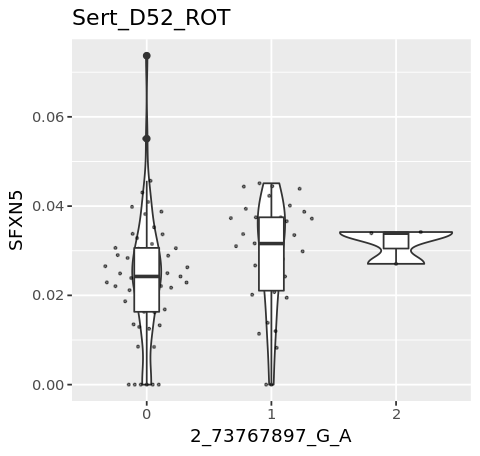

In [31]:
# ggplot(df_box, 
ggplot(df_box[df_box$donor_id %in% good_donors,], 
       aes(x = as.character(genotype), y = SFXN5)) + xlab(snp) +
    geom_violin() + geom_quasirandom(alpha = 0.5, size = 0.5) + geom_boxplot(width=0.2) + ggtitle("Sert_D52_ROT")

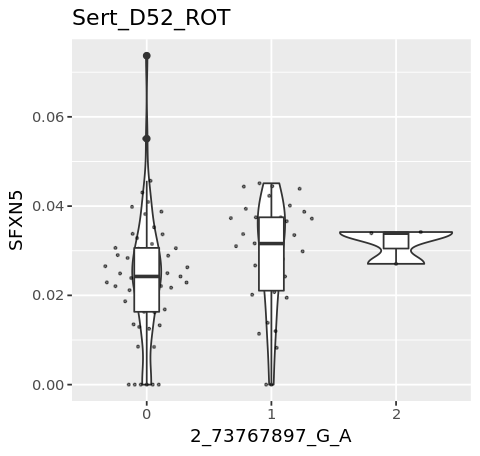

In [132]:
# ggplot(df_box[df_box$genotype %in% c(0,1),], 
ggplot(df_box[df_box$donor_id %in% good_donors,], 
       aes(x = as.character(genotype), y = SFXN5)) + xlab(snp) +
    geom_violin() + geom_quasirandom(alpha = 0.5, size = 0.5) + geom_boxplot(width=0.2) + ggtitle("Sert_D52_ROT")

In [32]:
# example 2
gene = "FGFR1"
# D11 FPP (and D11 P_FPP)

In [33]:
annos[annos$hgnc_symbol == gene,]

feature_id,chromosome,start,end


In [34]:
### rsid (FPP): rs3925
### rsid (P_FPP): 

In [35]:
leads[leads$feature_id == as.character(annos[annos$hgnc_symbol == gene,"ensembl_gene_id"]),]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label


In [36]:
snp = leads[leads$feature_id == as.character(annos[annos$hgnc_symbol == gene,"ensembl_gene_id"])
            & leads$label == "P_FPP_D11","snp_id"]

In [37]:
#### get expression
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
myfile = paste0(mydir,"pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.celltype.P_FPP.groupedby.donor_id-celltype.mean.tsv")
df = read.csv(myfile,sep="\t")
head(df)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

donor_id,celltype,n_cells,AL627309.1,AP006222.2,RP11.206L10.3,RP11.206L10.9,LINC00115,NOC2L,KLHL17,...,MT.ND3,MT.ND4L,MT.ND4,MT.ND5,MT.ND6,MT.CYB,AC011043.1,AL592183.1,PNRC2.1,SRSF10.1
HPSI0114i-eipl_1,P_FPP,1217,0.009280643,0.3418392,0.008828639,0.005040491,0.007487964,0.4815755,0.013500769,...,1.319109,0.2015044,2.874430,1.1733724,0.4587706,2.171530,0.02662877,0.002244468,0.009346613,0.127432942
HPSI0114i-kolf_2,P_FPP,190,0.003320321,0.1854455,0.005438127,0.008366805,0.003488010,0.3011984,0.007945000,...,1.142614,0.2125254,2.598601,0.9154019,0.5492175,1.144560,0.09623521,0.023505468,0.000000000,0.002933964
HPSI0114i-wegi_1,P_FPP,2097,0.004134880,0.1857107,0.009563340,0.006807430,0.013163941,0.3652372,0.006996602,...,1.083112,0.1580659,2.450115,0.9588808,0.6881527,1.540627,0.08488477,0.032623567,0.008720264,0.106651425
HPSI0115i-aion_2,P_FPP,319,0.015013823,0.1739536,0.004735840,0.004450737,0.009010090,0.3828991,0.014090389,...,1.530480,0.2525125,2.770053,1.5726649,0.6089909,2.426620,0.11712592,0.000000000,0.016659437,0.206926525
HPSI0115i-aoxv_1,P_FPP,1477,0.009253491,0.2081047,0.001862930,0.005527560,0.007206053,0.4102992,0.013679845,...,1.555785,0.2521661,2.931019,1.3469845,0.6198581,2.085716,0.07619438,0.127373070,0.006385079,0.135596871
HPSI0115i-bimq_4,P_FPP,206,0.013760317,0.1245470,0.002673826,0.003828513,0.005049992,0.4211598,0.003000410,...,1.667565,0.3013913,3.097911,1.6440159,0.5375900,2.618253,0.03531337,0.043138642,0.005874957,0.217759132


In [38]:
sample_list = as.character(unique(df$donor_id))
length(sample_list)
head(sample_list)

[1] 172

[1] "HPSI0114i-eipl_1" "HPSI0114i-kolf_2" "HPSI0114i-wegi_1" "HPSI0115i-aion_2"
[5] "HPSI0115i-aoxv_1" "HPSI0115i-bimq_4"

In [27]:
write.csv(data.frame(samples = sample_list),"/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/samples_P_FPP_D11.csv")

In [43]:
genos = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/genotypes_8_38281658_G_A_samples_P_FPP_D11.csv")
# genos = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/genotypes_8_38281658_G_A_samples_P_FPP_D11_new_plink.csv")
colnames(genos) = c("donor_id","genotype")
head(genos)

donor_id,genotype
HPSI0114i-eipl_1,1
HPSI0114i-kolf_2,1
HPSI0114i-wegi_1,0
HPSI0115i-aion_2,0
HPSI0115i-aoxv_1,0
HPSI0115i-bimq_4,0


In [44]:
df_e = df[,c("donor_id",gene)]
head(df_e)

donor_id,FGFR1
HPSI0114i-eipl_1,0.5672554
HPSI0114i-kolf_2,0.5026197
HPSI0114i-wegi_1,0.3087078
HPSI0115i-aion_2,0.3777146
HPSI0115i-aoxv_1,0.3973255
HPSI0115i-bimq_4,0.4866907


In [45]:
df_box = as.data.frame(inner_join(genos, df_e))
nrow(df_box)
head(df_box,2)

Joining, by = "donor_id"


[1] 172

donor_id,genotype,FGFR1
HPSI0114i-eipl_1,1,0.5672554
HPSI0114i-kolf_2,1,0.5026197


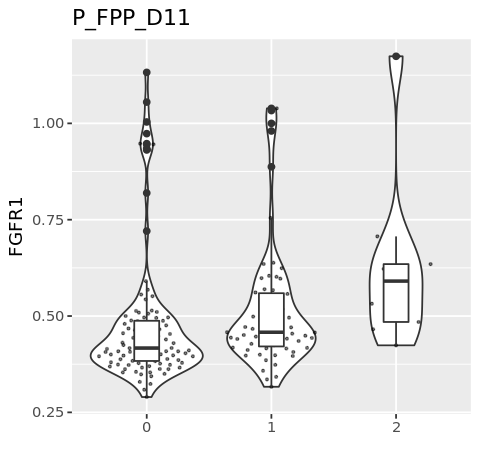

In [42]:
options(repr.plot.width=4, repr.plot.height=3.8)
ggplot(df_box, aes(x = as.character(genotype), y = FGFR1)) + xlab(snp) +
    geom_violin() + geom_quasirandom(alpha = 0.5, size = 0.5) + geom_boxplot(width=0.2) + ggtitle("P_FPP_D11")

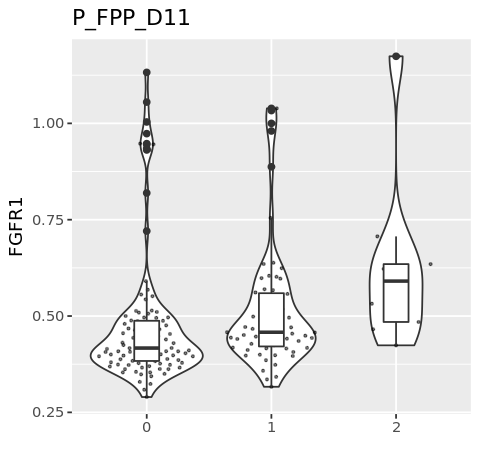

In [46]:
options(repr.plot.width=4, repr.plot.height=3.8)
ggplot(df_box, aes(x = as.character(genotype), y = FGFR1)) + xlab(snp) +
    geom_violin() + geom_quasirandom(alpha = 0.5, size = 0.5) + geom_boxplot(width=0.2) + ggtitle("P_FPP_D11")